In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
def mycg(A,b, x0=None, tol=1e-6,maxiter=1000, calcerror=False):
# solves Ax=b, where A is SPD.
# Parameters:
# 
    if calcerror:
        xref=np.linalg.solve(A,b)
        def err(x):
            e=xref-x
            return np.sqrt(e.dot(A.dot(e)))
    if x0 is None:
        x0=np.zeros_like(b)
    x=x0
    r=b-A.dot(x)
    rnorm2=np.inner(r,r)
    r0norm2=rnorm2
    p=r
    m=0
    tol2=tol*tol
    res=None
    if calcerror:
        res=np.array([err(x)])
    
    while rnorm2> tol2*r0norm2 and m< maxiter:
        q=A.dot(p)
        a=rnorm2/np.inner(q,p)
        x=x+a*p
        r=r-a*q
        rnorm2new=np.inner(r,r)
        beta=rnorm2new/rnorm2
        rnorm2=rnorm2new
        p=r+beta*p
        if calcerror:
            res =np.append(res, err(x) )
        m+=1
    return x, res

In [3]:
def mysd(A,b, x0=None, tol=1e-6,maxiter=1000, calcerror=False):
    if calcerror:
        xref=np.linalg.solve(A,b)
        def err(x):
            e=xref-x
            return np.sqrt(e.dot(A.dot(e)))
    if x0 is None:
        x0=np.zeros_like(b)
    x=x0
    r=b-A.dot(x)
    rnorm2=np.inner(r,r)
    r0norm2=rnorm2
    m=0
    tol2=tol*tol
    res=None
    if calcerror:
        res=np.array([err(x)])
    while rnorm2> tol2*r0norm2 and m< maxiter:
        q=A.dot(r)
        a = r.dot(r)/r.dot(q)
        x=x+a*r
        r=r-a*q
        rnorm2new=np.inner(r,r)
        rnorm2=rnorm2new
        if calcerror:
            res =np.append(res, err(x))
        m=m+1
    return x, res  

In [4]:
n=200
A=2*np.eye(n)-np.eye(n,k=1)-np.eye(n,k=-1)
b=np.ones(n)

In [6]:
kappa = np.linalg.cond(A)
sdrate= (kappa-1)/(kappa+1)
cgrate= (np.sqrt(kappa)-1)/(np.sqrt(kappa)+1)
kappa

16373.241898726716

In [7]:
xsd,ressd=mysd(A,b,calcerror=True, maxiter=10000)

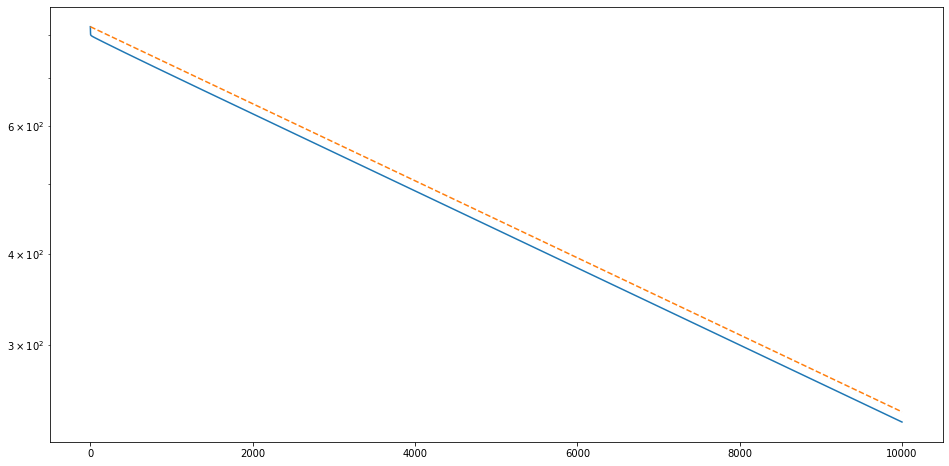

In [8]:
idxsd=np.arange(ressd.size)
sdestimate= ressd[0]*sdrate**idxsd
plt.semilogy(idxsd, ressd, idxsd, sdestimate, '--')

In [9]:
xcg, rescg=mycg(A,b,calcerror=True)

In [10]:
idxcg=np.arange(rescg.size)
cgestimate=ressd[0]*2*cgrate**idxcg

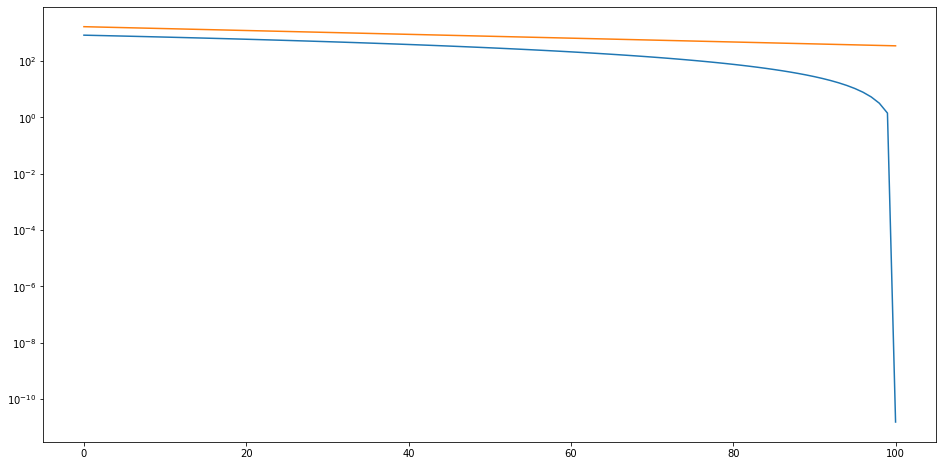

In [11]:
plt.semilogy(idxcg,rescg,idxcg,cgestimate)

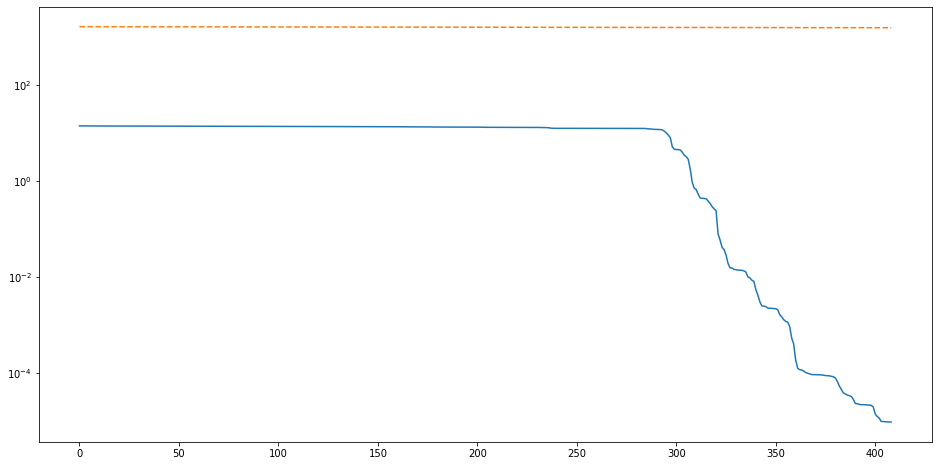

In [12]:
xcg2, rescg2=mycg(A.dot(A),A.dot(b), calcerror=True)
cg2rate= (kappa-1)/(kappa+1)
idxcg2=np.arange(rescg2.size)
cg2estimate=ressd[0]*2*cg2rate**idxcg2
plt.semilogy(idxcg2,rescg2,idxcg2,cg2estimate, '--')

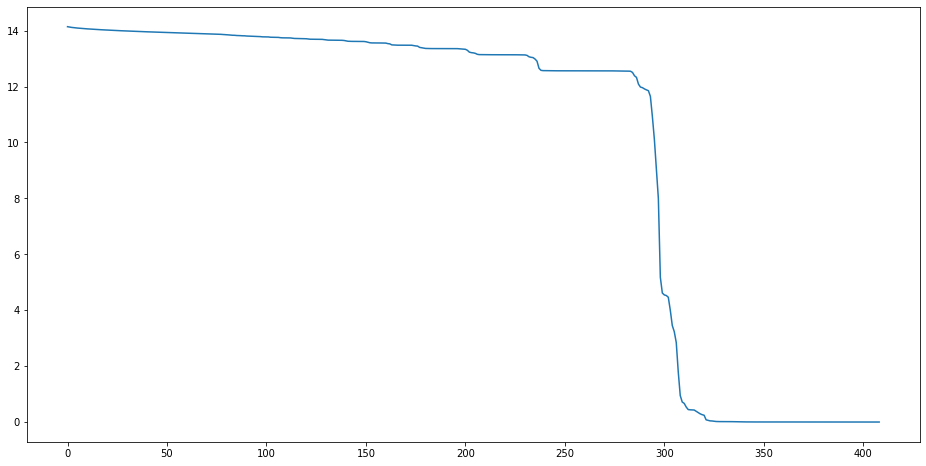

In [13]:
plt.plot(idxcg2,rescg2)